In [13]:
import os
import sys
from pathlib import Path

# Добавляем путь на уровень выше
sys.path.append(str(Path(os.getcwd()).resolve().parent))

from utils.features import *
from utils.load_data import load_all_data

import networkx as nx
import numpy as np
from node2vec import Node2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [23]:
data_dir = Path('../data/PEMS08')
metadata, data, adj = load_all_data(data_dir)

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

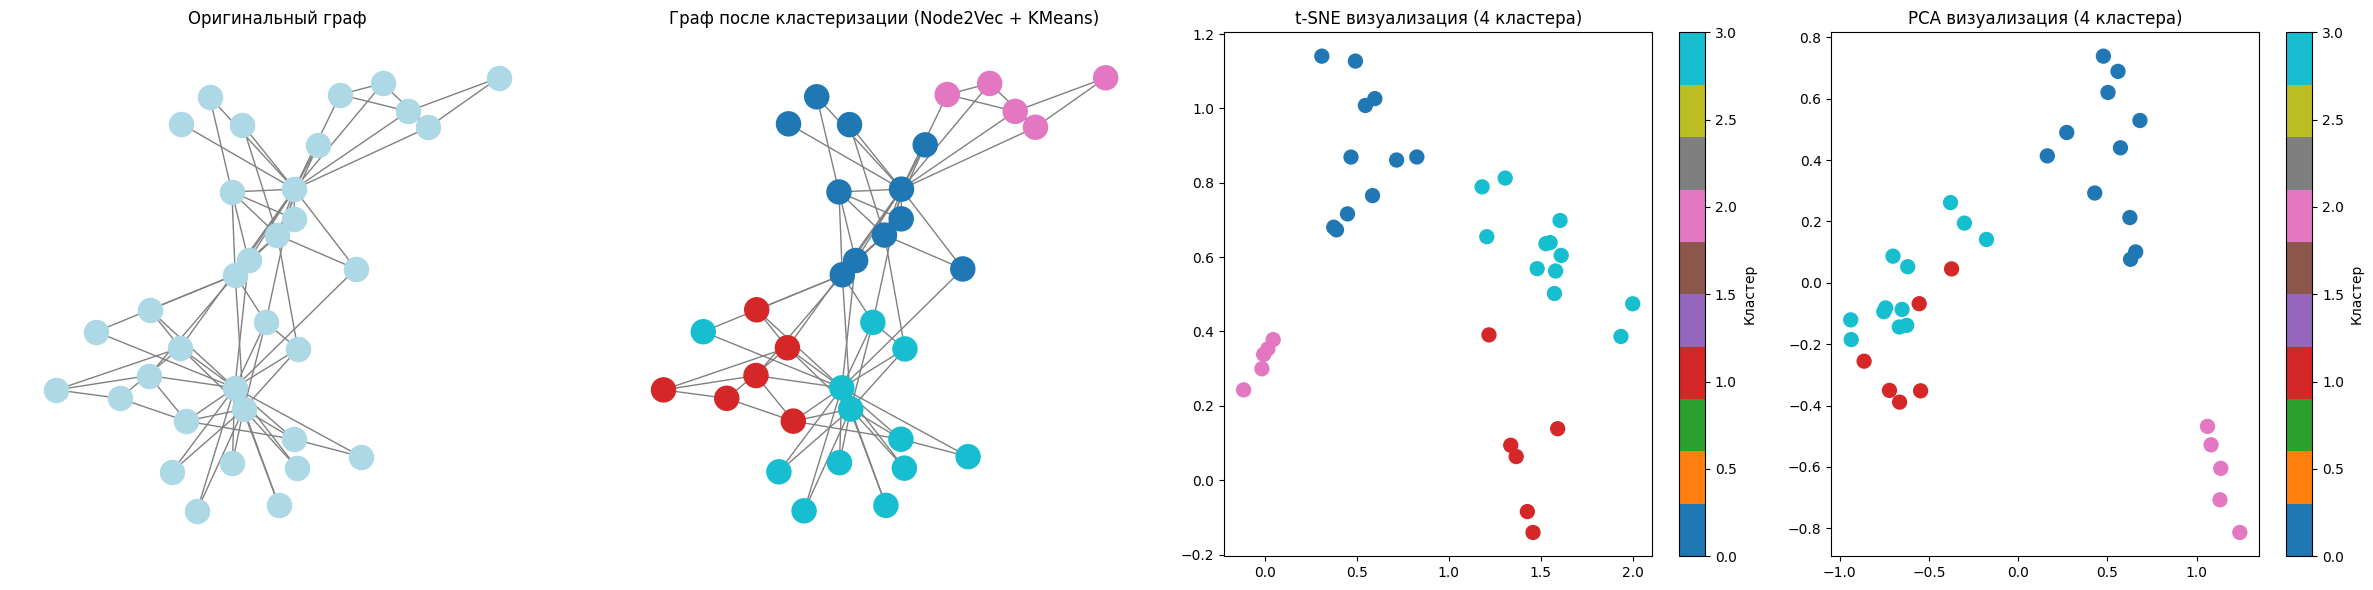

In [5]:
# 1. Создаем граф
G = nx.karate_club_graph()  # Пример графа (сообщество "Карате")
# np.fill_diagonal(adj, 0)
# G = nx.from_numpy_array(adj)

# 2. Визуализация оригинального графа
plt.figure(figsize=(24, 6))

# Оригинальный граф
plt.subplot(1, 4, 1)
pos = nx.spring_layout(G)  # Позиции узлов для визуализации
nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray')
plt.title("Оригинальный граф")

# 3. Применяем Node2Vec для получения embedding
node2vec = Node2Vec(G, dimensions=256, walk_length=30, num_walks=200, workers=4)  # Параметры Node2Vec
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Обучение модели

# Получаем embedding для всех узлов
embeddings = np.array([model.wv[str(node)] for node in G.nodes()])

# 4. Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=4)  # Количество кластеров
clusters = kmeans.fit_predict(embeddings)

# 5. Визуализация кластеризованного графа
plt.subplot(1, 4, 2)
nx.draw(G, pos, with_labels=False, node_color=clusters, cmap=plt.cm.tab10, edge_color='gray')
plt.title("Граф после кластеризации (Node2Vec + KMeans)")

# 6. Применяем t-SNE для уменьшения размерности embedding до 2D
tsne = TSNE(n_components=2, random_state=42)  # Уменьшаем до 2D для визуализации
embeddings_2d_tsne = tsne.fit_transform(embeddings)

# 7. Визуализация t-SNE с кластерами
plt.subplot(1, 4, 3)
plt.scatter(embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1], c=clusters, cmap=plt.cm.tab10, s=100)
plt.title("t-SNE визуализация (4 кластера)")
plt.colorbar(label="Кластер")

# 8. Применяем PCA для уменьшения размерности embedding до 2D
pca = PCA(n_components=2, random_state=42)  # Уменьшаем до 2D
embeddings_2d_pca = pca.fit_transform(embeddings)

# 9. Визуализация PCA с кластерами
plt.subplot(1, 4, 4)
plt.scatter(embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1], c=clusters, cmap=plt.cm.tab10, s=100)
plt.title("PCA визуализация (4 кластера)")
plt.colorbar(label="Кластер")

plt.tight_layout()
plt.show()